## 11. Time Series Regression Models

**Exercise 11.1**.  Produce a time series plot of the air passenger miles over the period January 1996 through May 2005 using seasonal plotting symbols.  Display the graph full-screen and discuss the seasonality that is displayed.  The data are in the file named `airmiles`.

**Solution**.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%capture
%run utils.py

In [3]:
data = pd.read_csv('../data/airmiles.dat')
data['date'] = pd.date_range('1996-01', periods=len(data), freq='M')

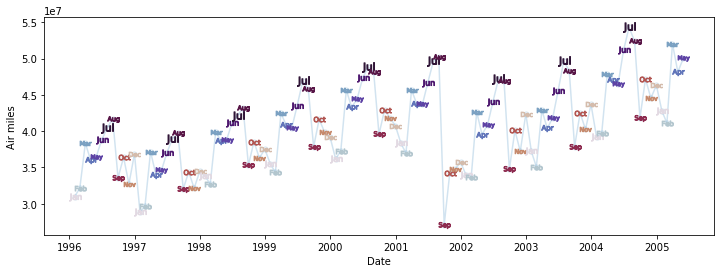

In [4]:
plot_monthly(data['date'], data['airmiles'], 'Date', 'Air miles')

As discussed during the text, there is seasonality (higher values in Jul, Aug and lower values in Jan, Feb), there is a growth trend, and there is an impact on 9/11.

**Exercise 11.2**.  Show that the expression given for $m_t$ in Equation (11.1.7) on page 251 satisfies the "AR(1)" recursion given in Equation (11.1.6) with the initial condition $m_0 = 0$.

**Solution**.  Equation (11.1.7) states that

$$ 
m_t = \begin{cases}
\omega \frac{1 - \delta^{t - T}}{1 - \delta} &\text{for } t > T \\
0 &\text{otherwise}
\end{cases}
$$

From Equation (11.1.6), we have

$$ m_t = \delta m_{t-1} + \omega S_{t-1}^{(T)} $$

Expanding on $m_{t-1}$ repeatedly, we get

$$ m_t = \sum_{j=0}^t \delta^j \omega S_{t-j}^{(T)} $$

But $S_{t-j}^{T}$ is 1 if $t - j > T$ and 0 otherwise, so the sum above is zero for $t \leq T$, and otherwise it is a finite geometric sum:

$$ m_t = \omega \sum_{j=1}^{T-t} \delta^j = \omega \frac{1 - \delta^{t - T}}{1 - \delta} $$

**Exercise 11.3**.  Find the "half-life" for the intervention effect specified in Equation (11.1.6) on page 251 when $\delta = 0.7$.

**Solution**.  The "half-life" $t_{1/2}$ is the defined as time time period when half of the ultimate change is achieved; that is, $1 - \delta^{t_{1/2}} = 0.5$, or $t_{1/2} = \log (0.5) / \log \delta$.  

For $\delta = 0.7$, we have $t_{1/2} \approx 1.94$.

**Exercise 11.4**.  Show that the "half-life" for the intervention effect specified in Equation (11.1.6) on page 251 increases without bound as $\delta$ increases to 1.

**Solution**.  The half-life as a function of $\delta$ is $t_{1/2}(\delta) = \log (0.5) / \log \delta$.  Since $\lim_{\delta \rightarrow 1-}\log \delta = 0$, we have the result, $\lim_{\delta \rightarrow 1-} \log (0.5) / \log \delta = + \infty$.

**Exercise 11.5**.  Show that for the intervention effect specified by Equation (11.1.6) on page 251,

$$ \lim_{\delta \rightarrow 1} m_t = \begin{cases}
\omega (T - t) &\text{for } t \geq T\\
0 &\text{otherwise}
\end{cases} $$

**Solution**.

Equation (11.1.6) states that

$$ m_t = \delta m_{t-1} + \omega S_{t-1}^{(T)} $$

Expanding on $m_{t-1}$ repeatedly, we get

$$ m_t = \sum_{j=0}^t \delta^j \omega S_{t-j}^{(T)} $$

But $S_{t-j}^{T}$ is 1 if $t - j > T$ and 0 otherwise, so the sum above is zero for $t \leq T$, and otherwise it is a finite geometric sum:

$$ m_t = \omega \sum_{j=0}^{T-t} \delta^j $$

In the limit where $\delta \rightarrow 1$, this is a sum of $T - t$ terms of value 1, so the limit is $\omega (T - t)$.  Then, the result follows.

**Exercise 11.6**.  Consider the intervention effect displayed in Exhibit 11.3, (b), page 253.

**(a)** Show that the jump at time $T + 1$ is of height $\omega$ as displayed.

**(b)** Show that, as displayed, the intervention effect tends to $\omega / (1 - \delta)$ as $t$ increases without bound.

**Solution**.

The intervention effect from Exhibit 11.3, (b) is

$$ m_t = \frac{\omega B}{1 - \delta B} S_t^{(T)} $$

**(a)**  We can expand the intervention effect as 

$$ m_t = \left(\omega B\right) \left(1 + \delta B + \delta^2 B^2 + \cdots\right) S_t^{(T)} = \left(\omega B + \delta \omega B^2 + \delta^2 \omega B^3 + \cdots\right) S_t^{(T)} $$

At time $t = T + 1$, the first backshift operator results in 1 ($B S_t^{(T)} = 1$) and all remaining backshift operators result in 0 ($B^k S_t^{(T)} = 0$ for $k > 1$).  Therefore the intervention has size $ m_{T + 1} = \omega $ as displayed.

**(b)**  We have

$$ \lim_{t \rightarrow \infty} m_t = \lim_{t \rightarrow \infty} \left(\omega B + \delta \omega B^2 + \delta \omega B^3 + \cdots\right) S_t^{(T)} = \omega \left(1 + \delta + \delta^2 + \cdots\right) = \frac{\omega}{1 - \delta} $$

since we have $\lim_{t \rightarrow \infty} B^k S_t^{(T)} = 1$ for any fixed $k$ -- since eventually $t$ is large enough that $k$ lags have passed and the backshift operator returns 1 instead of 0.

**Exercise 11.7**.  Consider the intervention effect displayed in Exhibit 11.3, (c), page 253.  Show that the effect increases linearly starting at time $T + 1$ with slope $\omega$ as displayed.

**Solution**.  The intervention effect from Exhibit 11.3, (c) is

$$ m_t = \frac{\omega B}{1 - B} S_{t}^{(T)} $$

It can be expanded as

$$ m_t = \left(\omega B \right) \left( \sum_{j=0}^\infty B^j \right) S_{t}^{(T)} = \omega \sum_{j=1}^\infty B^j S_{t}^{(T)} $$

For time prior to $T + 1$, all backshift operators return 0.  For time $t \geq T + 1$ or after, exactly $t - T$ backshift operators return 1, and the previous ones return zero; so,

$$
m_t = \begin{cases}
\omega (T - t) &\text{for } t \geq T\\
0 &\text{otherwise}
\end{cases}
$$

which is the desired result.

**Exercise 11.8**.  Consider the intervention effect displayed in Exhibit 11.4, (a), page 254.

**(a)** Show that the jump at time $T + 1$ is of height $\omega$ as displayed.

**(b)** Show that, as displayed, the intervention effect tends to go back to 0 as $t$ increases without bound.

**Solution**.  The intervention effect from Exhibit 11.4, (a) is

$$ m_t = \frac{\omega B}{1 - \delta B} P_t^{(T)} $$

We can expand the intervention effect as

$$ m_t = \left( \omega B \right) \left( 1 + \delta B + \delta^2 B^2 + \cdots \right) P_t^{(T)} = \left(\omega B + \delta \omega B^2 + \delta^2 \omega B^3 + \cdots\right) P_t^{(T)} $$

At most one term of the form $B^k P_t^{(T)}$ is non-zero; namely, when $t - k = T$, and then the term has value 1.  Therefore,

$$ m_t = \begin{cases}
\omega \delta^{t - T - 1} &\text{for } t > T \\
0 &\text{otherwise}
\end{cases} $$

In particular, this gives us the two results:

**(a)** $m_{T + 1} = \omega$

**(b)** $m_{t + 1} < m_t$ for $t > T$ and $\lim_{t \rightarrow \infty} m_t = 0$

**Exercise 11.9**.  Consider the intervention effect displayed in Exhibit 11.4, (b), page 254.

**(a)** Show that the jump at time $T + 1$ is of height $\omega_1 + \omega_2$ as displayed.

**(b)** Show that, as displayed, the intervention effect tends to $\omega_2$ as $t$ increases without bound.

**Solution**.  The intervention effect from Exhibit 11.4, (b) is

$$ m_t = \left[ \frac{\omega_1 B}{1 - \delta B} + \frac{\omega_2 B}{1 - B} \right] P_t^{(T)} $$

We can express it as

$$ 
\begin{align}
m_t &= \left[ \omega_1 B \left( 1 + \delta B + \delta^2 B^2 + \cdots \right) + \omega_2 B (1 + B + B^2 + \cdots) \right] P_t^{(T)} \\
&= \sum_{j=1}^\infty (\omega_1 \delta^{j-1} + \omega_2) B^j P_t^{(T)}
\end{align}
$$

Once again, for a given $t$, the backshift operator term $B^j P_t^{(T)}$ is non-zero only for $t + j = T + 1$, so we get

$$ m_t = \begin{cases}
\omega_1 \delta^{t - T - 1} + \omega_2 &\text{for } t > T \\
0 &\text{otherwise}
\end{cases} $$

In particular, this gives us the two results:

**(a)** $ m_{T+1} = \omega_1 + \omega_2$

**(b)** $ m_{t+1} > m_t$ for $t > T$ and $\lim_{t \rightarrow \infty} m_t = \omega_2$

**Exercise 11.10**.  Consider the intervention effect displayed in Exhibit 11.4, (c), page 254.

**(a)** Show that the jump at time $T$ is of height $\omega_0$ as displayed.

**(b)** Show that the jump at time $T + 1$ is of height $\omega_1 + \omega_2$ as displayed.

**(c)** Show that, as displayed, the intervention effect tends to $\omega_2$ as $t$ increases without bound.

**Solution**.  The intervention effect from Exhibit 11.4, (c) is

$$ m_t = \left[ \omega_0 + \frac{\omega_1 B}{1 - \delta B} + \frac{\omega_2 B}{1 - B} \right] P_t^{(T)} $$

For $t > T$, this is identical to the intervention effect from (b), seen in Exercise (11.9), as for those time steps $\omega_0 P_t^{(T)} = 0$.  For $t = T$, all non-$\omega_0$ terms are zero, and the intervention effect is $m_T = \omega_0$.  Therefore, 

$$ m_t = \begin{cases}
\omega_0 &\text{for } t = T \\
\omega_1 \delta^{t - T - 1} + \omega_2 &\text{for } t > T \\
0 &\text{otherwise}
\end{cases} $$

In particular, this gives us the three results:

**(a)** $m_T = \omega_0$

**(b)** $m_{T + 1} = \omega_1 + \omega_2$

**(c)** $ m_{t+1} > m_t$ for $t > T$ and $\lim_{t \rightarrow \infty} m_t = \omega_2$